In [913]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [914]:
df=pd.read_csv('Desktop/train.csv')

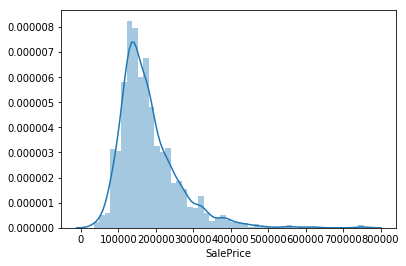

In [915]:
sns.distplot(df['SalePrice'])

In [899]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Normalization

In [900]:
ol=[   'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']
for i in ol:
    df[i]=(df[i])/(df[i].max())

Missing value

In [702]:
#feature
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [703]:
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)





#df["Fence"] = df["Fence"].fillna("None")

df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    df[col] = df[col].fillna('None')
for col in ('GarageCars'):
    df[col] = df[col].fillna(0)
for col in ('TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
#df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

#df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")
df["LotFrontage"] = df["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
 #process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

Another Na

In [901]:
df.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)
# MSSubClass as str
df['MSSubClass'] = df['MSSubClass'].astype(str)

# MSZoning NA in pred. filling with most popular values
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# LotFrontage  NA in all. I suppose NA means 0
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# Alley  NA in all. NA means no access
df['Alley'] = df['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
df.OverallCond = df.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# KitchenAbvGr to categorical
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    df[col] = df[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
df['GarageCars'] = df['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

# Year and Month to categorical
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [902]:
df=df[df['SalePrice']<700000]
#target=df['SalePrice']

In [750]:
df.drop(['Utilities','Alley'],axis=1,inplace = True)

ValueError: labels ['Utilities'] not contained in axis

In [751]:
df=df[df['Exterior2nd']!='Other']
#df=df[df['Utilities']!='NoSeWa']
df=df[df['HouseStyle']!='2.5Fin']
df=df[df['Electrical']!='Mix']
#df=df[df['GarageQual']!='Ex']
df=df[df['Condition2']!='RRAe']

df=df[df['Condition2']!='RRAn']

df=df[df['Condition2']!='RRNn']

df=df[df['RoofMatl']!='ClyTile']

df=df[df['RoofMatl']!='Membran']

df=df[df['RoofMatl']!='Metal']
df=df[df['RoofMatl']!='Roll']

df=df[df['Exterior1st']!='ImStucc']

df=df[df['Exterior1st']!='Stone']

df=df[df['Electrical']!='Floor']
df=df[df['Heating']!='OthW']

df=df[df['PoolQC']!='Fa']

df=df[df['MiscFeature']!='TenC']
df=df[df['Heating']!='Floor']







KeyError: 'RoofMatl'

In [903]:
target=df['SalePrice']
df.drop('SalePrice',axis=1,inplace=True)

In [904]:
df=pd.get_dummies(df)

In [905]:
df2=pd.read_csv('Desktop/test.csv')

another drop na

In [907]:
df2.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)
# MSSubClass as str
df2['MSSubClass'] = df2['MSSubClass'].astype(str)

# MSZoning NA in pred. filling with most popular values
df2['MSZoning'] = df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])

# LotFrontage  NA in all. I suppose NA means 0
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].mean())

# Alley  NA in all. NA means no access
df2['Alley'] = df2['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
df2.OverallCond = df2.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
df2['MasVnrType'] = df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df2[col] = df2[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
df2['TotalBsmtSF'] = df2['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
df2['Electrical'] = df2['Electrical'].fillna(df2['Electrical'].mode()[0])

# KitchenAbvGr to categorical
df2['KitchenAbvGr'] = df2['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
df2['KitchenQual'] = df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
df2['FireplaceQu'] = df2['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    df2[col] = df2[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
df2['GarageCars'] = df2['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
df2['SaleType'] = df2['SaleType'].fillna(df2['SaleType'].mode()[0])

# Year and Month to categorical
df2['YrSold'] = df2['YrSold'].astype(str)
df2['MoSold'] = df2['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
df2['TotalSF'] = df2['TotalBsmtSF'] + df2['1stFlrSF'] + df2['2ndFlrSF']
df2.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [906]:
ol=[   'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']
for i in ol:
    df2[i]=(df2[i])/(df2[i].max())

PreProcessing for test


In [712]:
df2.drop(['Utilities','Alley'],axis=1,inplace = True)
column1=['MiscFeature',
 'Condition2',
 'RoofMatl',
 'MiscFeature',
 'Exterior1st',
 'Heating']
#df2.drop(column1,axis=1,inplace=True)
df2=df2[df2['Exterior2nd']!='Other']
#df2=df2[df2['Utilities']!='NoSeWa']
df2=df2[df2['HouseStyle']!='2.5Fin']
df2=df2[df2['Electrical']!='Mix']
#df2=df2[df2['GarageQual']!='Ex']
#df2=df2[df2['GarageCond']!='Ex']


In [869]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(learning_rate=0.01,n_estimators=2800,max_features=56,loss='huber')


In [714]:
#model.fit(df,target)
#feature
df2['MSSubClass'] = df2['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df2['OverallCond'] = df2['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df2['YrSold'] = df2['YrSold'].astype(str)
df2['MoSold'] = df2['MoSold'].astype(str)

In [715]:

df2["Fence"] = df2["Fence"].fillna("None")

df2["FireplaceQu"] = df2["FireplaceQu"].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df2[col] = df2[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df2[col] = df2[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df2[col] = df2[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df2[col] = df2[col].fillna('None')
df2["MasVnrType"] = df2["MasVnrType"].fillna("None")
df2["MasVnrArea"] = df2["MasVnrArea"].fillna(0)
df2['MSZoning'] = df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])
df2["Functional"] = df2["Functional"].fillna("Typ")
df2['Electrical'] = df2['Electrical'].fillna(df2['Electrical'].mode()[0])
df2['KitchenQual'] = df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0])

#df2['Exterior1st'] = df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0])
df2['Exterior2nd'] = df2['Exterior2nd'].fillna(df2['Exterior2nd'].mode()[0])
df2['SaleType'] = df2['SaleType'].fillna(df2['SaleType'].mode()[0])
df2['MSSubClass'] = df2['MSSubClass'].fillna("None")
df2["LotFrontage"] = df2["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
 #process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df2[c].values))



In [908]:
df2=pd.get_dummies(df2)
#df2.drop(['GarageCond_Ex'],axis=1,inplace = True)

In [909]:
df.shape

(1458, 282)

In [910]:
df2.shape

(1459, 273)

In [911]:
x1=df.columns
x2=df2.columns

In [912]:
for c in x1:
    if c not in x2:
        print(c)


Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Electrical_Mix
KitchenAbvGr_0.3333333333333333
KitchenAbvGr_0.6666666666666666
GarageQual_Ex


In [768]:
df2.drop(['MSSubClass_150'],axis=1,inplace=True)
df.drop(['Exterior1st_ImStucc',
'Exterior1st_Stone',
'KitchenAbvGr_3',
'GarageQual_Ex'] , axis=1, inplace=True)

ValueError: labels ['Exterior1st_ImStucc' 'Exterior1st_Stone' 'KitchenAbvGr_3'
 'GarageQual_Ex'] not contained in axis

In [870]:
model.fit(df,target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=3,
             max_features=56, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [785]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(max_features=40,n_estimators=3000)

In [786]:
model3.fit(df,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=40, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [787]:
x3=model3.predict(df2)

In [871]:
x=model.predict(df2)

In [771]:
x2=(x+x3)/2

In [772]:
import numpy as np
z=np.array(range(1459))
z=z+1461

In [872]:
d={'ID': z,'SalePrice':x}


In [873]:
yy=pd.DataFrame(d)

In [874]:
yy.to_csv('Desktop/jj.csv',index=False)

In [875]:
yy

,ID,SalePrice
0,1461,121274.284220
1,1462,159757.935753
2,1463,185984.261592
3,1464,196245.037119
4,1465,189623.054358
5,1466,171433.802355
6,1467,170019.523459
7,1468,164382.767186
8,1469,192978.754209
9,1470,123392.439268


Now we gonna work on train test spilit

In [792]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df,target)

In [793]:
from sklearn.metrics import mean_absolute_error

In [846]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ridge_regression

In [795]:
modell=GradientBoostingRegressor(learning_rate=0.03, n_estimators=3000)
 

In [796]:
modell.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [797]:
print(mean_absolute_error(modell.predict(test_x),test_y))

16810.525703386207


In [798]:
modell=GradientBoostingRegressor()

In [799]:
modell.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [800]:
print(mean_absolute_error(modell.predict(test_x),test_y))

18504.91685082873


In [801]:
modell=DecisionTreeRegressor()

In [802]:
modell.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [803]:
print(mean_absolute_error(modell.predict(test_x),test_y))

28199.914364640885


In [852]:
modell=GradientBoostingRegressor(learning_rate=0.017,n_estimators=2900,max_features=60,loss='huber')


In [853]:
modell.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.017, loss='huber', max_depth=3,
             max_features=60, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2900,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [835]:
print(mean_absolute_error(modell.predict(test_x),test_y))  #Gradient boosting learnrate=0.017 n=2900 fea=60

15882.436046933077


In [854]:
print(mean_absolute_error(modell.predict(test_x),test_y))

15504.626319245912


In [650]:
print(mean_absolute_error(modell.predict(test_x),test_y))

16003.223149955356


In [653]:
print(mean_absolute_error(modell.predict(test_x),test_y))

14700.954906159413


In [656]:
print(mean_absolute_error(modell.predict(test_x),test_y))

14758.219537631081


In [659]:
print(mean_absolute_error(modell.predict(test_x),test_y))

14671.716509586562
